# Epoch shifting of phase diagram

## Import modules

In [9]:
# IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('/home/jovyan/work/src')
%set_env ucac4_path=/home/jovyan/work/support/ucac4/UCAC4
import do_charts_vast
import reading
import utils
from star_description import StarDescription

%matplotlib inline
plt.style.use('seaborn')
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

env: ucac4_path=/home/jovyan/work/support/ucac4/UCAC4
found environ with ucac4 path /home/jovyan/work/support/ucac4/UCAC4


## Supporting functions

27
0.25510204081632637
location, len 5 50 45
['b' 'b' 'b' 'b']
len colors 50


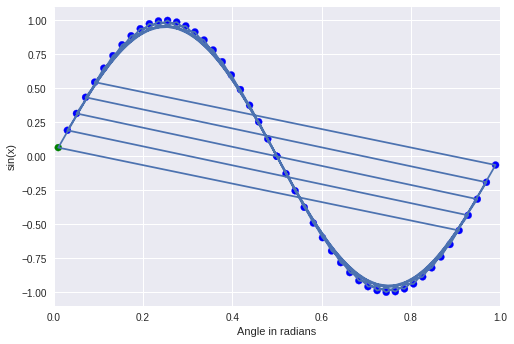

In [16]:
import numpy as np
import matplotlib.pyplot as plt
timespi = 5
x = np.linspace(-timespi*np.pi, timespi*np.pi, 50)
y = np.sin(x)
period=2*np.pi
phased_x = np.mod(x / period, 1)
maxsin = y.argmax()
print(maxsin)
print(phased_x[maxsin])
location = np.argmin(abs(phased_x))
print("location, len", location, len(phased_x), len(phased_x) - location)
print(np.repeat("b", location-1))

def define_colors(normal_color, special_color, location, color_len):    
    colors = np.repeat(normal_color, color_len)
    colors[location] = special_color
    return colors

colors = define_colors("b", "g", location, len(phased_x))
print("len colors", len(colors))
plt.scatter(phased_x, y, color=colors)
plt.errorbar(phased_x, y)


plt.xlabel('Angle in radians')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.xlim(0, 1)
plt.show()

In [61]:
def shift_to_epoch(epoch: float, t_np):
    """ shift the center of the array to the epoch"""
    if not epoch:
        return t_np
    assert isinstance(epoch, float)
    t_epoch_location = (np.abs(t_np - epoch)).argmin()
    print("epoch location is ", t_epoch_location)
    t_np_zeroed = t_np - t_np[t_epoch_location]
    print("the t_np zeroad on location is ", t_np_zeroed[t_epoch_location])
    return t_np_zeroed

In [8]:
import numpy as np
import matplotlib.pyplot as plt
timespi = 5
x = np.linspace(-timespi*np.pi, timespi*np.pi, 500)
y = np.sin(x)
period=2*np.pi
maxsin = y.argmin()
shift_x = shift_to_epoch(x[maxsin], x)
phased_x = np.mod(shift_x / period, 1)
phased_x_final = np.append(np.subtract(phased_x, 1), phased_x)
phased_lc_final = np.append(y, y)

plt.errorbar(phased_x_final, phased_lc_final)
plt.xlabel('phase')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.xlim(-1, 1)
plt.show()

NameError: name 'shift_to_epoch' is not defined